# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [65]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
df.duplicated().sum()

1

In [69]:
df.drop_duplicates(inplace = True)

In [70]:
df.drop("region",axis = 1,inplace = True)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*EDA*

UNIVARIATE ANALYSIS

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 73.1+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age')

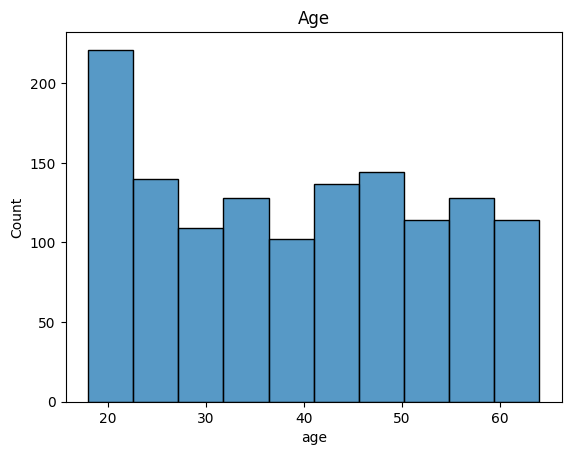

In [73]:
sns.histplot(df["age"],bins = 10)
plt.title("Age")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'BMI')

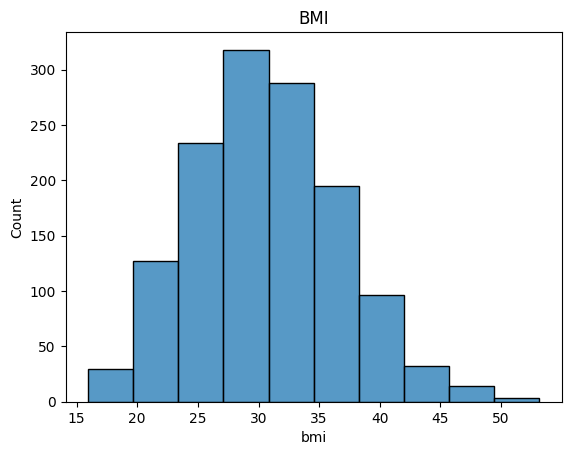

In [74]:
sns.histplot(df["bmi"],bins = 10)
plt.title("BMI")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Charges')

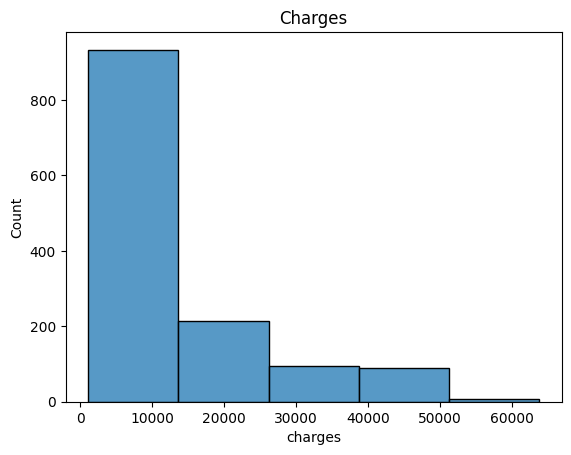

In [75]:
sns.histplot(df["charges"],bins = 5)
plt.title("Charges")

Text(0.5, 1.0, 'Sex')

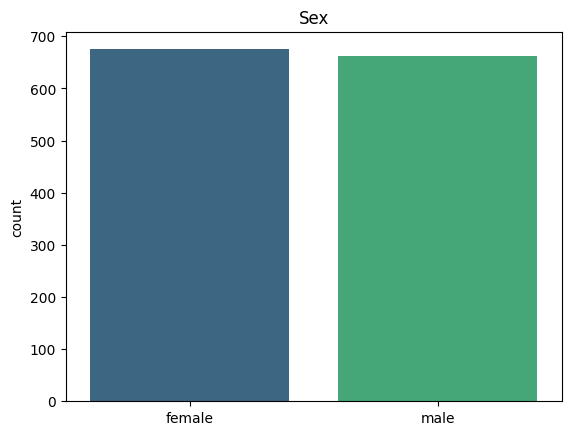

In [76]:
x = df["sex"].unique()
y = df["sex"].value_counts()
sns.barplot(x = x,y = y,palette = "viridis")
plt.title("Sex")


Text(0.5, 1.0, 'Smoker')

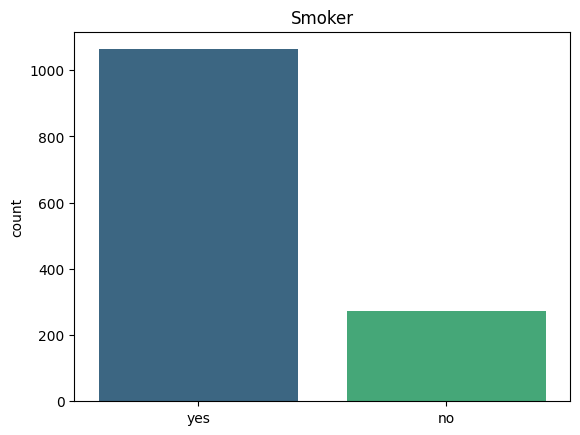

In [77]:
x = df["smoker"].unique()
y = df["smoker"].value_counts()
sns.barplot(x = x,y = y,palette = "viridis")
plt.title("Smoker")

Text(0.5, 1.0, 'Children')

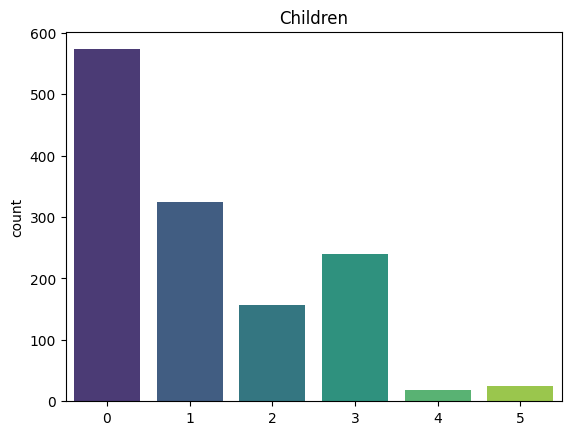

In [78]:
x = df["children"].unique()
y = df["children"].value_counts()
sns.barplot(x = x,y = y,palette = "viridis")
plt.title("Children")

BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Age VS Charges')

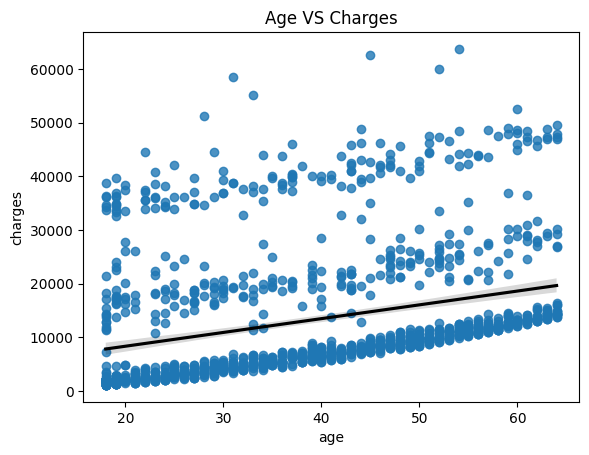

In [79]:
sns.regplot(y = "charges",x = "age", data = df,line_kws = {"color":"black"})
plt.title("Age VS Charges")

Text(0.5, 1.0, 'BMI VS Charges')

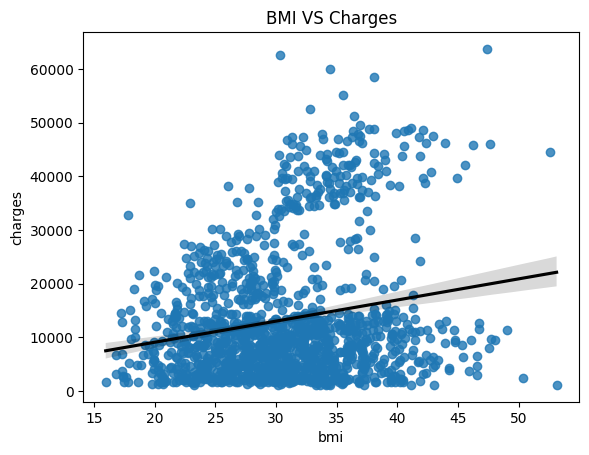

In [80]:
sns.regplot(y = "charges",x = "bmi", data = df,line_kws = {"color":"black"})
plt.title("BMI VS Charges")

Text(0.5, 1.0, 'BMI VS Age')

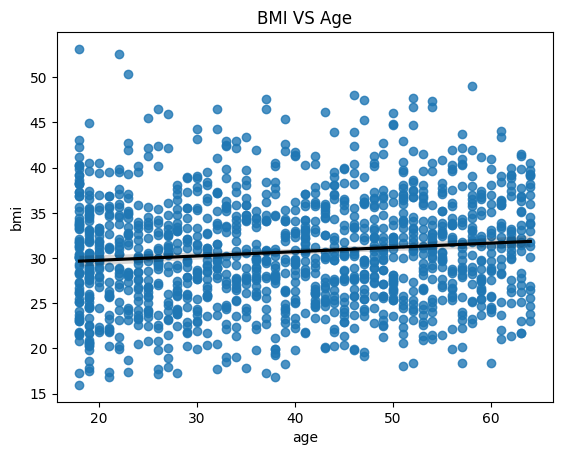

In [81]:
sns.regplot(y = "bmi",x = "age", data = df,line_kws = {"color":"black"})
plt.title("BMI VS Age")

Text(0.5, 1.0, 'Sex VS Charges')

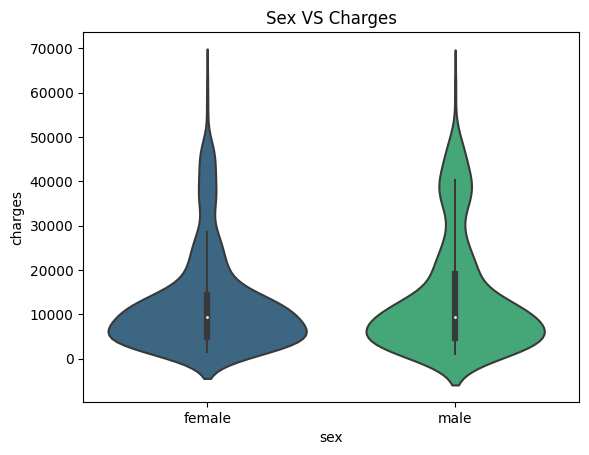

In [82]:
sns.violinplot(x = "sex",y = "charges",data = df,palette = "viridis")
plt.title("Sex VS Charges")

Text(0.5, 1.0, 'Smoker VS Charges')

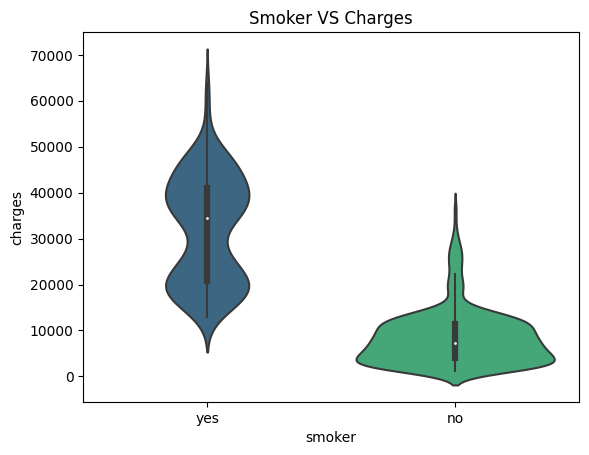

In [83]:
sns.violinplot(x = "smoker",y = "charges",data = df,palette = "viridis")
plt.title("Smoker VS Charges")

<Axes: xlabel='sex', ylabel='count'>

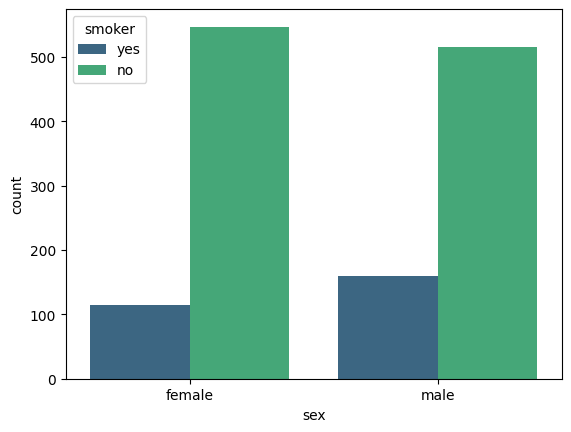

In [84]:
sns.countplot(data=df,x="sex",hue="smoker",palette = "viridis")

MULTIVARIATE ANALYSIS

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 73.1+ KB


In [86]:
num_df = df.select_dtypes(include = ["int64","float64"])

<Axes: >

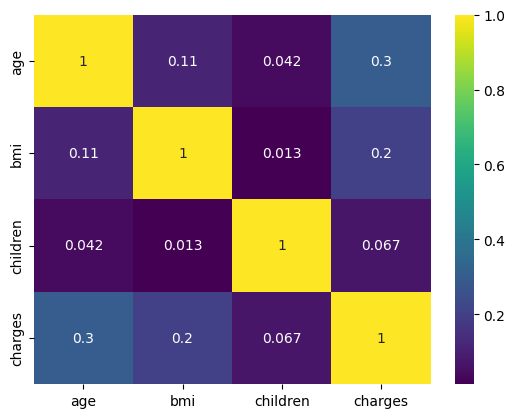

In [87]:
sns.heatmap(num_df.corr(),annot = True,cmap = "viridis")

INSIGHTS:
1. The dataset has more volumn for records having age from 20 - 25.
2. 

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [89]:
X = df.drop(columns = ["charges"])
y = df["charges"]

In [90]:
num_feats = ["age", "bmi", "children"]
cat_feats = ["sex", "smoker"] 

In [91]:
numeric_transformer = Pipeline([
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_feats),
    ("cat", categorical_transformer, cat_feats),
])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
def make_pipeline_with_model(model):
    return Pipeline([
        ("preproc", preprocessor),
        ("regressor", model)
    ])

lm = make_pipeline_with_model(LinearRegression())
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

Linear Regression Performance

In [94]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 5991.820601004326
MAE: 4198.111800474602
R2: 0.804621881177266


In [98]:
ridge = Ridge()
param_grid = {"regressor__alpha": [0.1, 1.0, 10.0, 100.0, 200.0]}
ridge_pipe = make_pipeline_with_model(ridge)
grid_ridge = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_ridge.fit(X_train, y_train)

print("Best params for Ridge:", grid_ridge.best_params_)
y_pred_ridge = grid_ridge.predict(X_test)
print("Ridge Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R2:", r2_score(y_test, y_pred_ridge))

Best params for Ridge: {'regressor__alpha': 1.0}
Ridge Performance:
RMSE: 6006.838497881287
MAE: 4215.120617188815
R2: 0.8036412625187787


In [95]:
lasso = Lasso()
param_grid_lasso = {"regressor__alpha": [0.001, 0.01, 0.1, 1, 10]}
lasso_pipe = make_pipeline_with_model(lasso)
grid_lasso = GridSearchCV(lasso_pipe, param_grid_lasso, cv=5, scoring="neg_mean_squared_error")
grid_lasso.fit(X_train, y_train)

print("Best params for Lasso:", grid_lasso.best_params_)
y_pred_lasso = grid_lasso.predict(X_test)
print("Lasso Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R2:", r2_score(y_test, y_pred_lasso))

Best params for Lasso: {'regressor__alpha': 10}
Lasso Performance:
RMSE: 6000.315264009209
MAE: 4203.953815684795
R2: 0.8040675095247511


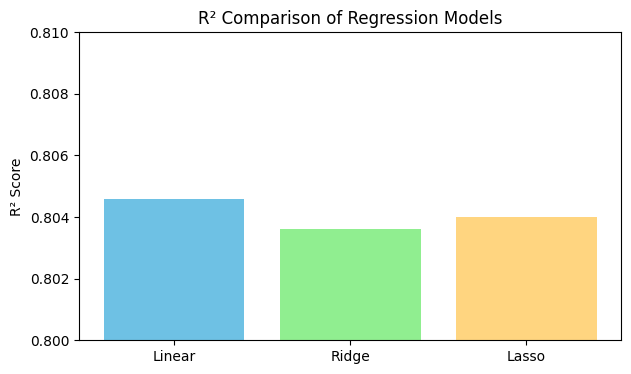

In [100]:

models = ['Linear', 'Ridge', 'Lasso']
r2 = [0.8046, 0.8036, 0.8040]
rmse = [5991.82, 6006.83, 6000.31]

plt.figure(figsize=(7,4))
plt.bar(models, r2, color=['#6EC1E4','#90EE90','#FFD580'])
plt.title('R² Comparison of Regression Models')
plt.ylabel('R² Score')
plt.ylim(0.80, 0.81)
plt.show()


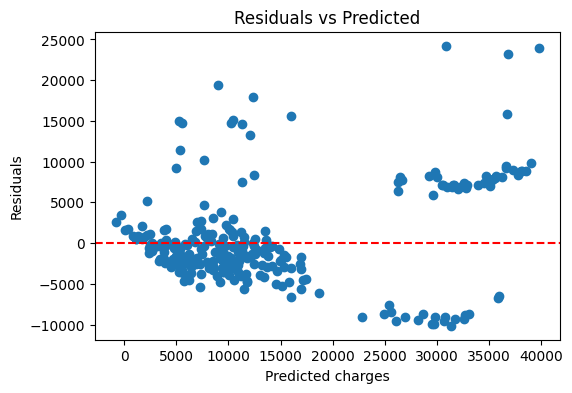

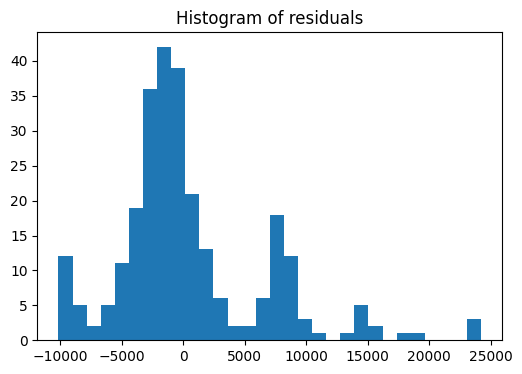

In [101]:
y_pred_final = y_pred

residuals = y_test - y_pred_final
plt.figure(figsize=(6,4))
plt.scatter(y_pred_final, residuals)
plt.axhline(0, color="red", ls="--")
plt.xlabel("Predicted charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Histogram of residuals")
plt.show()

In [102]:
import joblib

joblib.dump(lm, "insurance_premium_model.pkl")
print("Model saved successfully!")


Model saved successfully!
